Loading the data file in google- colab as , I am using this versatile and available anywhere tool on my different PCs. (Learnt from towardsdata science article) Ref: [link text](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)

# Setup

In [54]:
from google.colab import files
uploaded = files.upload()

Saving day.csv to day (6).csv


Importing necessary Libraries and filtering the warnings 


In [55]:
#IMPORT NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Importing the data file to dataframe as 'boom'

In [56]:
import io
boom = pd.read_csv(io.BytesIO(uploaded['day.csv']))

# Data Understanding:


In [57]:
#Read the Head of dataframe to give us an idea how does it look like :
boom.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [58]:
#checking the different parameters of this dataset:
  #total counts of rows and columns
boom.shape

(730, 16)

In [59]:
  #more information
  boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [60]:
#so we found there is no null present in dataframe thats a good news to us . And we can also observe that in each for each column , there are 730 entries which match the shape as well so no missing values as well ..
#let us find the summary of this df
boom.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [61]:
# Finding and removing duplicates if any :
# Use the DataFrame.duplicated() method to return a series of boolean values
boom.duplicated(subset=None, keep='first')



0      False
1      False
2      False
3      False
4      False
       ...  
725    False
726    False
727    False
728    False
729    False
Length: 730, dtype: bool

In [62]:
#so we found there is no duplicates

# Data Cleaning:

#Lets extract month and year from dteday 

In [63]:
boom['year'] = pd.DatetimeIndex(boom['dteday']).year
boom['month'] = pd.DatetimeIndex(boom['dteday']).month
boom.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,2
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,3
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,4
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,5


In [64]:
#Removing redundant & unwanted columns
#We will remove the following data fromt the data set : - instant : as just an index, - dteday : we already have saperate coulumn for year and month, - casual & registered : not our objective , holiday: we have working day which should be sufficient .
#yr and mnth: as we have already extracted the year and months
# we will keep the original datafram and create new dataframe called: newboom to preserve dataset need be in case:

In [65]:
newboom=boom[['season','weekday','workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','cnt', 'year', 'month']]

In [66]:
#check if columns are dropped:
newboom.columns

Index(['season', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'year', 'month'],
      dtype='object')

In [67]:
newboom.head()

,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,2,1,2,14.902598,17.68695,69.6087,16.652113,801,2018,2
2,1,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,3
3,1,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,4
4,1,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,5


In [68]:
# Renaming some columns for better understanding

newboom.rename(columns={'hum':'humidity','cnt':'count'},inplace=True)

In [69]:
newboom.head()

,season,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,year,month
0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,2,1,2,14.902598,17.68695,69.6087,16.652113,801,2018,2
2,1,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,3
3,1,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,4
4,1,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,5


#  Encoding the Labels & Visualization

1) **season**
1:spring
2:summer
3:fall
4:winter

In [70]:
codes = {1:'spring',2:'summer',3:'fall',4:'winter'}
newboom['season'] = newboom['season'].map(codes)

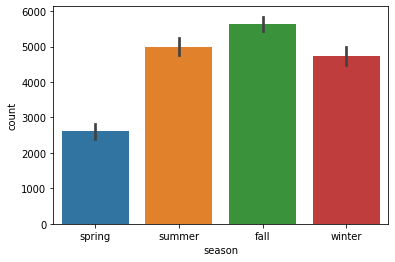

In [71]:
sns.barplot('season','count',data=newboom)


Bike Rentals are more during the Fall(Monsoon) season.¶

**2) weather situstion**
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [72]:
codes = {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
newboom['weathersit'] = newboom['weathersit'].map(codes)

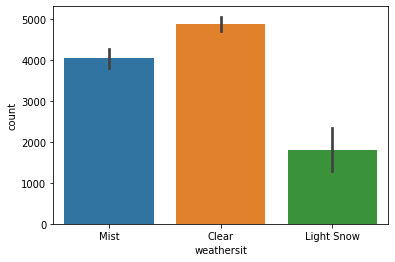

In [73]:
sns.barplot('weathersit','count',data=newboom)


Bikes seem to be rented more in Partly cloudy weather.

3) **workingday**
if day is neither weekend nor holiday is 1,
otherwise is 0

In [74]:
codes = {1:'working_day',0:'Holiday'}
newboom['workingday'] = newboom['workingday'].map(codes)

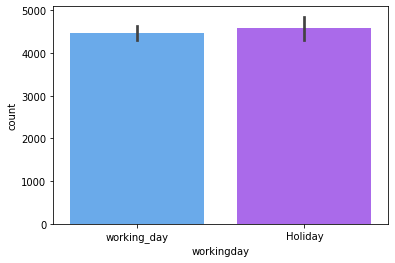

In [75]:
sns.barplot('workingday','count',data=newboom,palette='cool')

## **4) year**
2018:0
2019:1

In [76]:
codes = {2019:1,2018:0}
newboom['year'] = newboom['year'].map(codes)

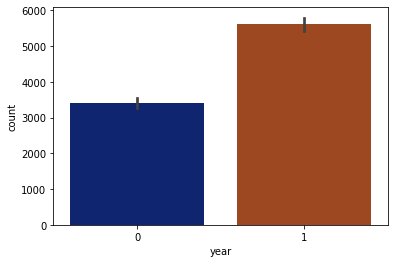

In [77]:
sns.barplot('year','count',data=newboom,palette='dark')

5) Month
**bold text**1:Jan
2:Feb
3:Mar
4:Apr
5:May
6:June
7:July
8:Aug
9:Sep
10:Oct
11:Nov
12:Dec

In [78]:
#Bike rents got shooted up in 2019 comparitively to 2018

**5) Month**
1:Jan
2:Feb
3:Mar
4:Apr
5:May
6:June
7:July
8:Aug
9:Sep
10:Oct
11:Nov
12:Dec

In [79]:
codes = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
newboom['month'] = newboom['month'].map(codes)

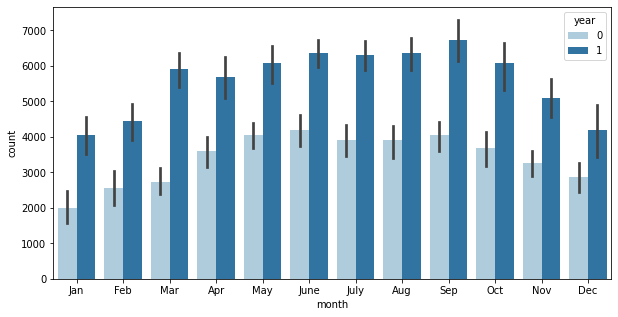

In [80]:
plt.figure(figsize=(10,5))
sns.barplot('month','count',hue='year',data=newboom,palette='Paired')

6) **WeekDay**:
0:Mon
1:Tue
2:Wed
3:Thu
4:Fri
5:Sat
6:Sun

In [81]:
codes = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
newboom['weekday'] = newboom['weekday'].map(codes)

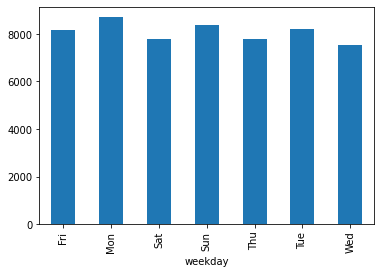

In [82]:
newboom.groupby('weekday')['count'].max().plot(kind='bar')

In [83]:
#Sunday and mondays are busier.

**7)Temperature**

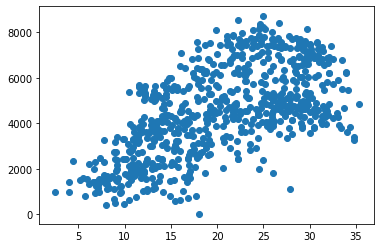

In [84]:
plt.scatter('temp','count',data=newboom)


In [85]:
#Bike rentals are higher  with temperature increse

8) Feel like temperature
**bold text**


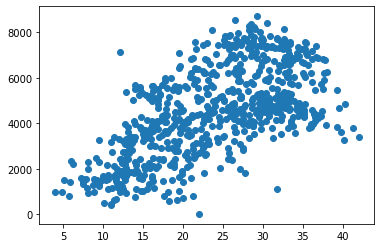

In [86]:
plt.scatter('atemp','count',data=newboom)


In [87]:
#same as temerature, the feel like temperature keeps the rentals alongwith it . it increases together

9) Humidity

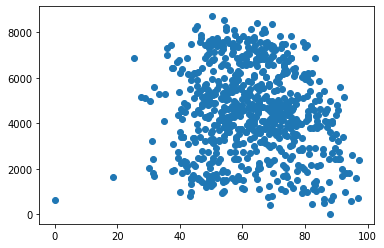

In [88]:
plt.scatter('humidity','count',data=newboom)


In [89]:
#high humid weather gets more bikes rented


In [90]:
# 10)windspeed

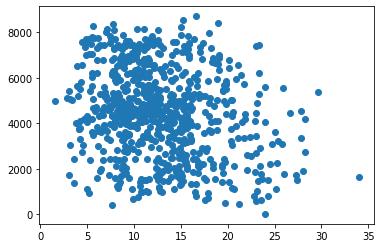

In [91]:
plt.scatter('windspeed','count',data=newboom)


In [92]:
#Wind speeds increase with a greater temperature difference.Wind speed near the surface is most highly correlated with the temperature.


# Visualize the relationship among the variables

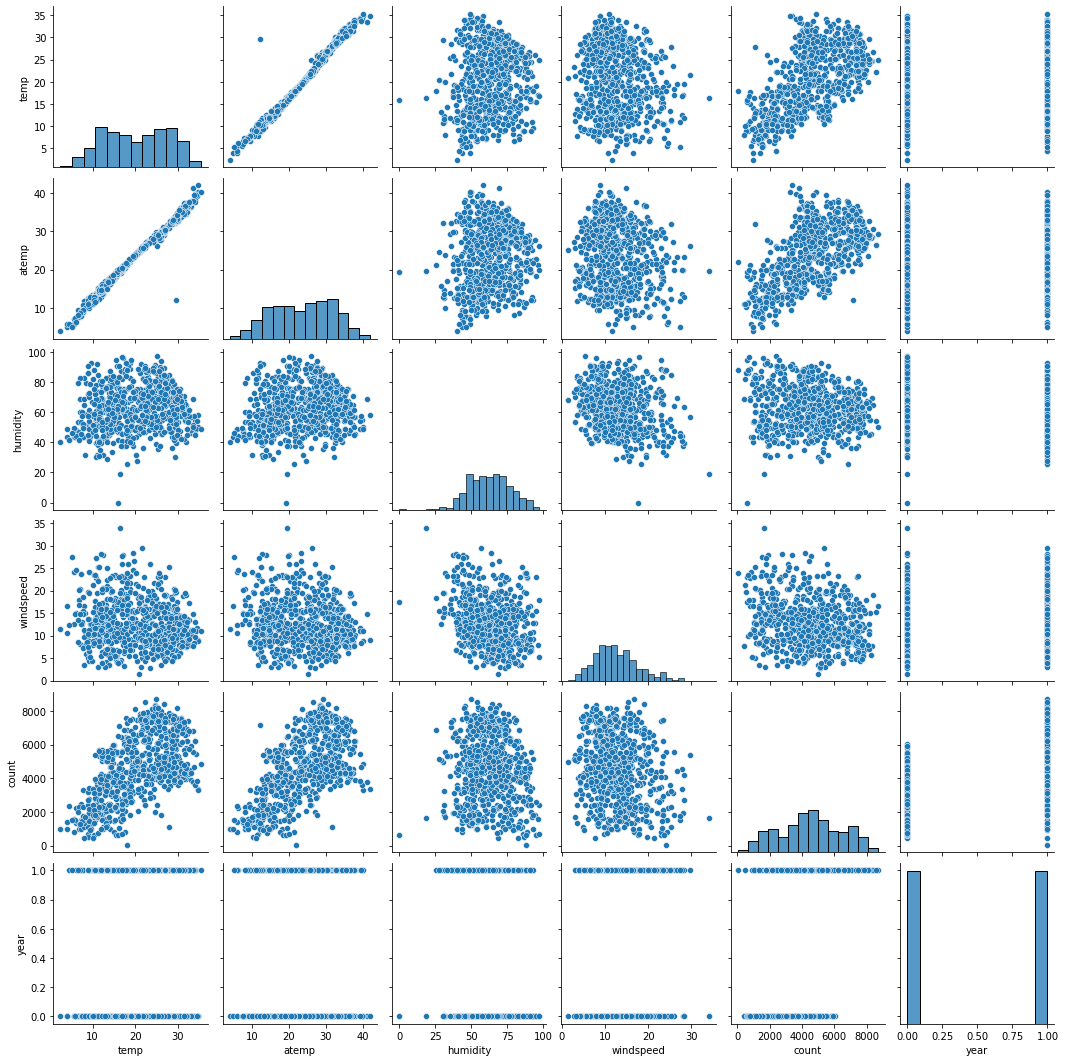

In [93]:
sns.pairplot(newboom)

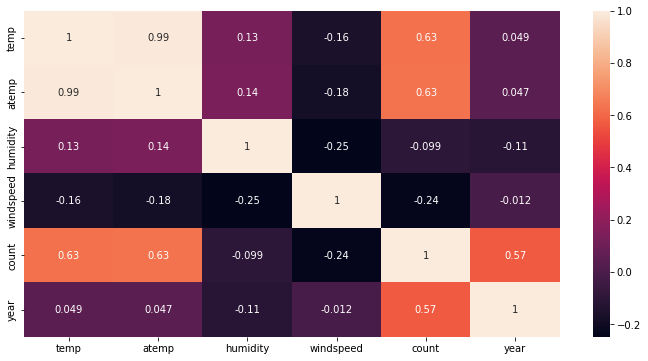

In [94]:
plt.figure(figsize = (12,6))
sns.heatmap(newboom.corr(),annot=True)

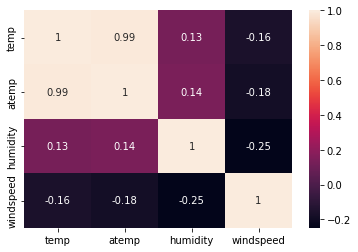

In [95]:
data= newboom[['temp','atemp','humidity','windspeed']]
sns.heatmap(data.corr(),annot=True)

It is observed that atemp and temp are highly correlated and one can be dropped to avoid multicollinearity.¶

In [96]:
#lets drop the 'feel like ' atemp column:
newboom.drop('atemp',axis=1,inplace=True)


## Categorical variables: 

In [97]:
seasons = pd.get_dummies(newboom['season'],drop_first=True)

working_day = pd.get_dummies(newboom['workingday'],drop_first=True)

weather= pd.get_dummies(newboom['weathersit'],drop_first=True)

month= pd.get_dummies(newboom['month'],drop_first=True)

week_day= pd.get_dummies(newboom['weekday'],drop_first=True)
newboom= pd.concat([newboom,seasons,working_day,weather,month,week_day],axis=1)
newboom.head()

,season,weekday,workingday,weathersit,temp,humidity,windspeed,count,year,month,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,Tue,working_day,Mist,14.110847,80.5833,10.749882,985,0,Jan,...,0,0,0,0,0,0,0,0,1,0
1,spring,Wed,working_day,Mist,14.902598,69.6087,16.652113,801,0,Feb,...,0,0,0,0,0,0,0,0,0,1
2,spring,Thu,working_day,Clear,8.050924,43.7273,16.636703,1349,0,Mar,...,0,0,0,0,0,0,0,1,0,0
3,spring,Fri,working_day,Clear,8.200000,59.0435,10.739832,1562,0,Apr,...,0,0,0,0,0,0,0,0,0,0
4,spring,Sat,working_day,Clear,9.305237,43.6957,12.522300,1600,0,May,...,1,0,0,0,0,1,0,0,0,0


In [98]:
# Dropping the categorical variables as they are already dummy-encoded.

In [99]:
newboom.drop(['season','workingday','weathersit','weekday','month'],axis=1,inplace=True)

In [100]:
newboom.head()


,temp,humidity,windspeed,count,year,spring,summer,winter,working_day,Light Snow,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,14.110847,80.5833,10.749882,985,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,14.902598,69.6087,16.652113,801,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,8.050924,43.7273,16.636703,1349,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,8.200000,59.0435,10.739832,1562,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,9.305237,43.6957,12.522300,1600,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


# Step 5: Lets Split the Data into Training and Testing Sets

In [101]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(newboom, train_size = 0.7, random_state = 333)

In [104]:
#Verifying the train - test split and new dataframe details

bike_train.shape

(510, 28)

In [105]:
bike_train.describe()

,temp,humidity,windspeed,count,year,spring,summer,winter,working_day,Light Snow,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,20.218078,62.340743,12.771365,4494.103922,0.501961,0.250980,0.245098,0.241176,0.690196,0.025490,...,0.084314,0.080392,0.086275,0.082353,0.145098,0.147059,0.143137,0.131373,0.141176,0.152941
std,7.500110,14.418728,5.205888,1948.315655,0.500487,0.434003,0.430568,0.428217,0.462867,0.157763,...,0.278131,0.272166,0.281045,0.275172,0.352545,0.354512,0.350557,0.338139,0.348545,0.360284
min,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.717923,51.604150,9.011098,3146.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.209597,62.233700,12.125057,4508.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26.786653,72.958300,15.624869,5962.750000,1.000000,0.750000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,35.328347,96.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [107]:
bike_test.shape


(220, 28)

In [106]:
bike_test.describe()

,temp,humidity,windspeed,count,year,spring,summer,winter,working_day,Light Snow,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,20.553817,63.749086,12.745665,4540.236364,0.495455,0.236364,0.268182,0.250,0.690909,0.036364,...,0.086364,0.086364,0.081818,0.081818,0.136364,0.131818,0.140909,0.168182,0.150000,0.122727
std,7.533926,13.790510,5.184271,1911.199159,0.501120,0.425817,0.444023,0.434,0.463173,0.187620,...,0.281541,0.281541,0.274713,0.274713,0.343957,0.339064,0.348721,0.374881,0.357886,0.328872
min,3.957390,29.000000,3.875669,506.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.189577,53.260450,9.041851,3193.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.756250,63.687500,12.146128,4593.500000,0.000000,0.000000,0.000000,0.000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,27.119778,73.333350,15.643227,5959.750000,1.000000,0.000000,1.000000,0.250,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,34.815847,97.250000,28.292425,8395.000000,1.000000,1.000000,1.000000,1.000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Insight: **Based on the 70% - 30% split between train and test dataset we have 510 rows in train dataset and 220 in test dataset**

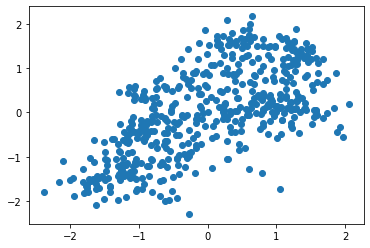

In [49]:
#Rescaling the Features¶

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
# Apply scaler() to all the columns except the'dummy' variables.

num_vars=['temp','humidity','windspeed','count']

df_train[num_vars]= scaler.fit_transform(df_train[num_vars])
plt.scatter('temp','count',data=df_train)

# Checking Correlation Coefficient

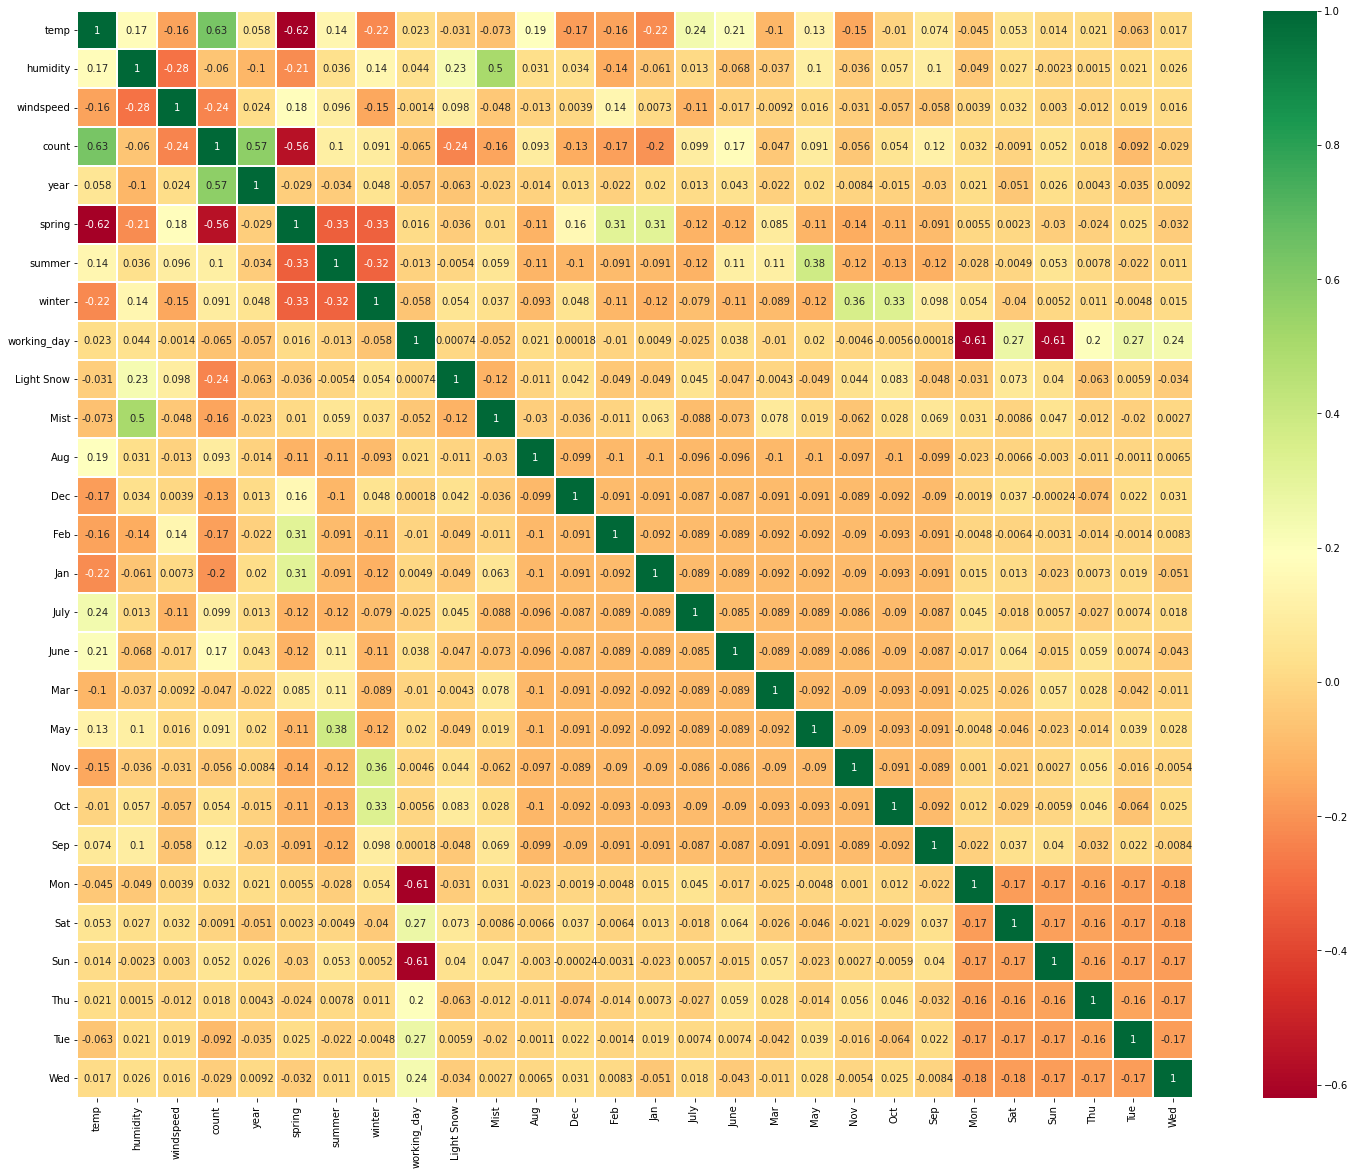

In [108]:
plt.figure(figsize = (25,20))
ax= sns.heatmap(bike_train.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

Insight:
There is multi-colinearity between the variables. We need to consider the factors when developing the model.

temp  has very high correlation value. This suggest, we can use only one of these two variables
workingday variable has high negative correlation with Sat & Sun (where workingday =0)
Spring is negatively correlated with cnt
emp, atemp and yr has strong correlation with cnt
misty weather and humidity has correlation
various months and corresponding weather has correlation

## Building the Linear Model

**Dividing into X_train and y_train**

In [110]:
y_train = bike_train.pop('count')
X_train = bike_train

 **RFE**
Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE

In [111]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

TypeError: ignored